In [1]:
# Setup

import sys
import cPickle as pickle
import numpy as np
import time
import matplotlib.pyplot as plt

data_path = 'data/linear_svm.pkl'
with open(data_path, 'r') as f:
    datadict = pickle.load(f)
    X = datadict['X']
    y = datadict['y']

W = np.random.randn(10, 3073) * 0.0001 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# Check implementation with numeric method

from files.linear_svm import *
from files.gradient_check import grad_check

loss, grad = svm_loss_naive(W, X, y, 0)
f = lambda w: svm_loss_naive(w, X, y, 0.0)[0]

grad_numerical = grad_check(f, W, grad, 10)

numerical: -2.853054 analytic: -2.853054, relative error: 3.790447e-11
numerical: 25.716845 analytic: 25.716845, relative error: 1.378890e-11
numerical: -5.970148 analytic: -5.970148, relative error: 2.429301e-11
numerical: -12.777061 analytic: -12.777061, relative error: 2.114052e-11
numerical: -17.950521 analytic: -17.950521, relative error: 3.001808e-12
numerical: 12.883341 analytic: 12.883341, relative error: 1.059829e-11
numerical: 8.734447 analytic: 8.734447, relative error: 1.854402e-11
numerical: 33.077325 analytic: 33.077325, relative error: 1.573932e-12
numerical: 26.038596 analytic: 26.038596, relative error: 7.422420e-12
numerical: 3.321418 analytic: 3.321418, relative error: 2.268755e-11


In [8]:
# Compare naive to vectorized

start = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X, y, 0.00001)
stop = time.time()
naive_time = stop - start

print 'Naive loss: %e computed in %fs' % (loss_naive, stop - start)

start = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X, y, 0.00001)
stop = time.time()
vectorized_time = stop - start

print 'Vectorized loss: %e computed in %fs' % (loss_vectorized, stop - start)

# The loss difference should be 0, but your vectorized implementation should be much faster.
print 'difference: %f. Vectorized version is %fx faster' % (loss_naive - loss_vectorized, naive_time/vectorized_time)

Naive loss: 9.281699e+00 computed in 0.017967s
Vectorized loss: 9.281699e+00 computed in 0.001781s
difference: 0.000000. Vectorized version is 10.088220x faster


In [4]:
# Train a classifier

from files.linear_classifier import LinearSVM
svm = LinearSVM()
start = time.time()
loss_hist = svm.train(X, y, learning_rate=1e-7, reg=5e4, num_iters=1500)
stop = time.time()
print 'Training time %fs' % (stop - start)

iteration 0 / 1500: loss 22.276715
iteration 100 / 1500: loss 5.598963
iteration 200 / 1500: loss 2.420257
iteration 300 / 1500: loss 1.571103
iteration 400 / 1500: loss 1.388489
iteration 500 / 1500: loss 1.225324
iteration 600 / 1500: loss 1.020840
iteration 700 / 1500: loss 1.071782
iteration 800 / 1500: loss 1.145277
iteration 900 / 1500: loss 1.068349
iteration 1000 / 1500: loss 1.085741
iteration 1100 / 1500: loss 0.994768
iteration 1200 / 1500: loss 1.136146
iteration 1300 / 1500: loss 0.987454
iteration 1400 / 1500: loss 1.140376
Training time 3.573139s


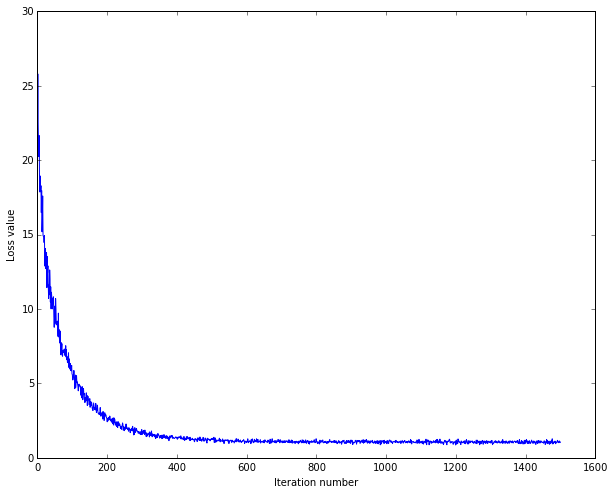

In [5]:
# Plot loss history

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')